In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pa

# Feature Normalization

### Why do we need feature normalization?
- In some models, features with large value are generally treated as 'more important', and the model might put more weight on that feature even if it is not so important. However, not every model we need to normalize features, in the model regarding decision trees, feature normalization is not required. In some typical models, such as ridge regression, lasso regression, SVM, and other general linear models, the difference between feature normalization and not is quite obvious. 
### Some methods of feature normalization
- Min-Max Normalization  

  <font size=4.5>$x^{*} = \frac{x - x_{min}}{x_{max} - x_{min}}$</font>  
  
- Z-Score  
  <font size=4.5>$x^{*} = \frac{x - \mu}{\sigma}$</font>
### Some tips:
- Don't forget to normalize the data in test set using the same method as train set. 
- Not every model requires feature normalization.

# Gradient Descent Setup
1. Write down the expression of $J(\theta)$ in matrix form

   $\hat{y} = X\theta + b \in \mathbb{R}^{m}$  
   
   $J(\theta) = \frac{1}{m}(y - \hat{y})^{T}(y - \hat{y})$


2. Write down the Gradient of $J(\theta)$ in matrix form  

   $\nabla J(\theta)=\frac{1}{m}(X \theta-y)^{T} \frac{\partial(X \theta-y)}{\partial \theta}=\frac{1}{m}(X \theta-y)^{T} X$  


3. $J(\theta+\eta \Delta) \approx J(\theta)+\nabla J(\theta)^{T} \eta \Delta$  


4. $\theta^{\prime}=\theta-\eta \nabla J(\theta)$


In [2]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    train_num_inst, train_num_feat=train.shape
    train_normalized=np.zeros((train_num_inst,train_num_feat))
    for i in range(train_num_feat):
        train_normalized[:,i]=(train[:,i]-min(train[:,i]))/(max(train[:,i])-min(train[:,i]))
        #print(i)
        
    test_num_inst, test_num_feat=test.shape
    test_normalized=np.zeros((test_num_inst,test_num_feat))
    for i in range(test_num_feat):
        test_normalized[:,i]=(test[:,i]-min(test[:,i]))/(max(test[:,i])-min(test[:,i]))
    
    
    return train_normalized,test_normalized

In [3]:
df = pd.read_csv('data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

In [4]:
df = pd.read_csv('data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)


Split into Train and Test


In [5]:
print("Scaling all to [0, 1]")
X_train_norm,X_test_norm = feature_normalization(X_train, X_test)
X_train_norm

Scaling all to [0, 1]


array([[1.        , 1.        , 1.        , ..., 0.13241261, 0.13241261,
        0.13241261],
       [1.        , 1.        , 1.        , ..., 0.92975578, 0.92975578,
        0.92975578],
       [1.        , 1.        , 1.        , ..., 0.91055382, 0.91055382,
        0.91055382],
       ...,
       [1.        , 0.        , 0.        , ..., 0.04886354, 0.04886354,
        0.04886354],
       [1.        , 1.        , 1.        , ..., 0.58441163, 0.58441163,
        0.58441163],
       [0.        , 0.        , 0.        , ..., 0.03210449, 0.03210449,
        0.03210449]])

# The Square Loss Function

## Ridge Regresison (Linear Regression with $\mathit{l}_{2}$ regularization)

- **The objective function of ridge regression is:**    
$J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x_{i}\right)-y_{i}\right)^{2}+\lambda \theta^{T} \theta$



- **What are the advantages of $\mathit{l}_{2}$ regularization?**    
Observing the penalty term $\lambda \theta^{T}\theta$, it is quadratic, and therefore differentiable. Apart from this, $\mathit{l}_{2}$ regularization is more stable than $\mathit{l}_{1}$ regularization


- **What are the disadvantages of $\mathit{l}_{2}$ regularization?**  
It is computational expensive to calculate the derivative, and thus it takes more RAM. Even if the disadvantage exists, $\mathit{l}_{2}$ regularization is the most commonly used regularization  


- **Compute the gradient of $J(\theta)$ in matrix form**  
$\nabla J(\theta)=\frac{1}{m}(x \theta-y)^{T} \frac{\partial(x \theta-y)}{\partial \theta}+\frac{\partial \lambda \theta^{T} \theta}{\partial \theta}=\frac{1}{m}(x \theta-y)^{T} x+2 \lambda \theta^{T}$

In [16]:
theta = np.random.randn(X_train.shape[1])

In [17]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    num_instances=y.shape[0]
    y_predict=np.dot(X,theta)
    #y=y.reshape(y.shape[0],1)
    differences = y_predict-y
    square_loss=(1/(2*num_instances))*np.dot(differences,differences)
    
    return square_loss
    
    #TODO

In [18]:
compute_square_loss(X_train, y_train, theta)

55.4866033262572

In [19]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    #y=y.reshape(y.shape[0],1)
    n=y.shape[0]
    gradient=(1/n)*(np.dot(np.dot(X.T,X),theta)-np.dot(X.T,y))
    return gradient

In [20]:
G=compute_square_loss_gradient(X_train, y_train, theta)

# Gradient Checker

In [21]:
###########################################
### Gradient Checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm.  Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1)

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    e=np.eye(num_features)
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    for i in range(num_features):
        approx_grad[i]=(compute_square_loss(X, y, theta+epsilon*(e[:,i]))-compute_square_loss(X, y, theta-epsilon*(e[:,i])))/(2*epsilon)
    
    distance=np.linalg.norm(approx_grad-true_gradient)
    
    if distance<=tolerance:
       
        return True
    else:
        
        return False


In [22]:
grad_checker(X_train, y_train, theta, epsilon=0.01, tolerance=1e-4)

True

# Generic Gradient Checker

In [23]:
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. And check whether gradient_func(X, y, theta) returned
    the true gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    true_gradient = gradient_func(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    e=np.eye(num_features)
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    for i in range(num_features):
        approx_grad[i]=(objective_func(X, y, theta+epsilon*(e[:,i]))-objective_func(X, y, theta-epsilon*(e[:,i])))/(2*epsilon)
    
    distance=np.linalg.norm(approx_grad-true_gradient)
    
    if distance<=tolerance:
        
        return True
    else:
        
        return False
    #TODO

# Batch Gradient Descent

In [38]:
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run
        check_gradient - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features)
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.zeros(num_features) #initialize theta
    theta_hist[0]=theta
    for i in range(num_iter):
        if grad_checker(X,y,theta_hist[i,:])==False:
                print("Alpha:",alpha)
                print("Gradient Fail! at step",i)
                break
        theta_hist[i+1,:]=theta_hist[i,:]-alpha*compute_square_loss_gradient(X, y, theta_hist[i,:])
        loss_hist[i]=compute_square_loss(X, y, theta_hist[i,:])
    return theta_hist,loss_hist

In [39]:
theta_hist_001,loss_hist_001=batch_grad_descent(X_train, y_train, alpha=0.01, num_iter=1000, check_gradient=False)
theta_hist_005,loss_hist_005 = batch_grad_descent(X_train,y_train,alpha=0.05,check_gradient=True)
theta_hist_01,loss_hist_01= batch_grad_descent(X_train,y_train,alpha=0.1,check_gradient=True)
theta_hist_05,loss_hist_05 = batch_grad_descent(X_train,y_train,alpha=0.5,check_gradient=True)

Alpha: 0.05
Gradient Fail! at step 10
Alpha: 0.1
Gradient Fail! at step 7
Alpha: 0.5
Gradient Fail! at step 4


In [33]:
len(loss_hist_001)

1001

C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


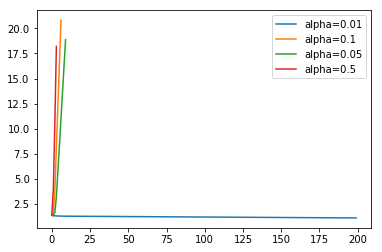

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(200),np.log(loss_hist[:200]),label="alpha=0.01")
plt.plot(range(200),np.log(loss_hist_01[:200]),label="alpha=0.1")
plt.plot(range(200),np.log(loss_hist_005[:200]),label="alpha=0.05")
plt.plot(range(200),np.log(loss_hist_05[:200]),label="alpha=0.5")
plt.legend(loc = 1)
plt.show()

In [264]:
theta_hist_5,loss_hist_5=batch_grad_descent(X_train, y_train, alpha=0.005, num_iter=1000, check_gradient=False)

C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


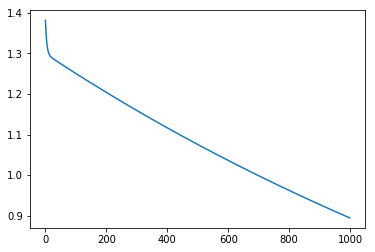

In [265]:
plt.plot(range(len(loss_hist_5)),np.log(loss_hist_5),label="alpha=0.05")

# Ridge Regression
1) $J(\theta) = \frac{1}{m}(X\theta-y)^{T}(X\theta-y)+\lambda\theta^{T}\theta $

2) $\triangledown J(\theta) = \frac{1}{m}(X^TX\theta-X^Ty)+2\lambda\theta^T$

In [73]:
def compute_regularized_loss(X,y,theta,lambda_reg):
    num_instances=y.shape[0]
    y_predict=np.dot(X,theta)
    #y=y.reshape(y.shape[0],1)
    differences = y_predict-y
    square_loss=(1/(2*num_instances))*np.dot(differences,differences)+lambda_reg*np.dot(theta,theta)
    return square_loss

In [86]:
X.shape

(200, 48)

In [87]:
y.shape

(200,)

In [116]:
theta.shape

(48,)

In [92]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    n=X.shape[0]
    gradient_ridge=(1/n)*(np.dot(np.dot(X.T,X),theta)-np.dot(X.T,y))+2*lambda_reg*theta
    return gradient_ridge


In [93]:
compute_regularized_square_loss_gradient(X_train, y_train, theta,0.1)

array([ -9.28077893,  -9.14335642,  -8.4655793 ,  -8.2366148 ,
        -7.82321374,  -7.5951364 ,  -6.61276415,  -6.75228758,
        -6.9818213 ,  -5.96551875,  -4.91428957,  -4.47782702,
        -3.29042777,  -2.60406641,  -2.21903578,  -1.88592946,
        -1.34845177,  -0.26550076,  -7.37628333,  -7.47213347,
       -38.18929205,  -6.81210909,  -6.71145625, -34.3470937 ,
        -5.94079531,  -5.83338795, -29.17735801,  -4.90598117,
        -5.19814195, -26.35431336,  -4.3713358 ,  -4.32312618,
       -23.13284794,   7.29263034,   7.02098944,  34.68227125,
         5.96589353,   6.13870023,  30.29035801,   5.47231228,
         5.53061729,  26.1636343 ,   4.81225064,   4.72162541,
        22.65428378,   3.8960197 ,   4.18774606,  19.97950809])

In [27]:
def regularized_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features)
        loss_hist - the history of loss function without the regularization term, 1D numpy array.
    """
    (num_instances, num_features) = X.shape
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    
    theta_hist[0]=theta
    for i in range(num_iter):
        if grad_checker(X,y,theta_hist[i,:])==False:
                print("Alpha:",alpha)
                print("Gradient Fail! at step",i)
                #break
        theta_hist[i+1,:]=theta_hist[i,:]-alpha*compute_regularized_square_loss_gradient(X, y, theta_hist[i,:])
        loss_hist[i]=compute_regularized_loss(X, y, theta_hist[i,:])
    return theta_hist,loss_hist
    
    
    #TODO

In [32]:
regularized_theta_hist,regularized_loss_hist=batch_grad_descent(X_train, y_train,0.05)

Alpha: 0.05
Gradient Fail! at step 10
Alpha: 0.05
Gradient Fail! at step 11
Alpha: 0.05
Gradient Fail! at step 12
Alpha: 0.05
Gradient Fail! at step 13
Alpha: 0.05
Gradient Fail! at step 14
Alpha: 0.05
Gradient Fail! at step 15
Alpha: 0.05
Gradient Fail! at step 16
Alpha: 0.05
Gradient Fail! at step 17
Alpha: 0.05
Gradient Fail! at step 18
Alpha: 0.05
Gradient Fail! at step 19
Alpha: 0.05
Gradient Fail! at step 20
Alpha: 0.05
Gradient Fail! at step 21
Alpha: 0.05
Gradient Fail! at step 22
Alpha: 0.05
Gradient Fail! at step 23
Alpha: 0.05
Gradient Fail! at step 24
Alpha: 0.05
Gradient Fail! at step 25
Alpha: 0.05
Gradient Fail! at step 26
Alpha: 0.05
Gradient Fail! at step 27
Alpha: 0.05
Gradient Fail! at step 28
Alpha: 0.05
Gradient Fail! at step 29
Alpha: 0.05
Gradient Fail! at step 30
Alpha: 0.05
Gradient Fail! at step 31
Alpha: 0.05
Gradient Fail! at step 32
Alpha: 0.05
Gradient Fail! at step 33
Alpha: 0.05
Gradient Fail! at step 34
Alpha: 0.05
Gradient Fail! at step 35
Alpha: 0.05


Alpha: 0.05
Gradient Fail! at step 261
Alpha: 0.05
Gradient Fail! at step 262
Alpha: 0.05
Gradient Fail! at step 263
Alpha: 0.05
Gradient Fail! at step 264
Alpha: 0.05
Gradient Fail! at step 265
Alpha: 0.05
Gradient Fail! at step 266
Alpha: 0.05
Gradient Fail! at step 267
Alpha: 0.05
Gradient Fail! at step 268
Alpha: 0.05
Gradient Fail! at step 269
Alpha: 0.05
Gradient Fail! at step 270
Alpha: 0.05
Gradient Fail! at step 271
Alpha: 0.05
Gradient Fail! at step 272
Alpha: 0.05
Gradient Fail! at step 273
Alpha: 0.05
Gradient Fail! at step 274
Alpha: 0.05
Gradient Fail! at step 275
Alpha: 0.05
Gradient Fail! at step 276
Alpha: 0.05
Gradient Fail! at step 277
Alpha: 0.05
Gradient Fail! at step 278
Alpha: 0.05
Gradient Fail! at step 279
Alpha: 0.05
Gradient Fail! at step 280
Alpha: 0.05
Gradient Fail! at step 281
Alpha: 0.05
Gradient Fail! at step 282
Alpha: 0.05
Gradient Fail! at step 283
Alpha: 0.05
Gradient Fail! at step 284
Alpha: 0.05
Gradient Fail! at step 285
Alpha: 0.05
Gradient Fail

C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


Alpha: 0.05
Gradient Fail! at step 393
Alpha: 0.05
Gradient Fail! at step 394
Alpha: 0.05
Gradient Fail! at step 395
Alpha: 0.05
Gradient Fail! at step 396
Alpha: 0.05
Gradient Fail! at step 397
Alpha: 0.05
Gradient Fail! at step 398
Alpha: 0.05
Gradient Fail! at step 399
Alpha: 0.05
Gradient Fail! at step 400
Alpha: 0.05
Gradient Fail! at step 401
Alpha: 0.05
Gradient Fail! at step 402
Alpha: 0.05
Gradient Fail! at step 403
Alpha: 0.05
Gradient Fail! at step 404
Alpha: 0.05
Gradient Fail! at step 405
Alpha: 0.05
Gradient Fail! at step 406
Alpha: 0.05
Gradient Fail! at step 407
Alpha: 0.05
Gradient Fail! at step 408
Alpha: 0.05
Gradient Fail! at step 409
Alpha: 0.05
Gradient Fail! at step 410
Alpha: 0.05
Gradient Fail! at step 411
Alpha: 0.05
Gradient Fail! at step 412
Alpha: 0.05
Gradient Fail! at step 413
Alpha: 0.05
Gradient Fail! at step 414
Alpha: 0.05
Gradient Fail! at step 415
Alpha: 0.05
Gradient Fail! at step 416
Alpha: 0.05
Gradient Fail! at step 417
Alpha: 0.05
Gradient Fail

C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract


 616
Alpha: 0.05
Gradient Fail! at step 617
Alpha: 0.05
Gradient Fail! at step 618
Alpha: 0.05
Gradient Fail! at step 619
Alpha: 0.05
Gradient Fail! at step 620
Alpha: 0.05
Gradient Fail! at step 621
Alpha: 0.05
Gradient Fail! at step 622
Alpha: 0.05
Gradient Fail! at step 623
Alpha: 0.05
Gradient Fail! at step 624
Alpha: 0.05
Gradient Fail! at step 625
Alpha: 0.05
Gradient Fail! at step 626
Alpha: 0.05
Gradient Fail! at step 627
Alpha: 0.05
Gradient Fail! at step 628
Alpha: 0.05
Gradient Fail! at step 629
Alpha: 0.05
Gradient Fail! at step 630
Alpha: 0.05
Gradient Fail! at step 631
Alpha: 0.05
Gradient Fail! at step 632
Alpha: 0.05
Gradient Fail! at step 633
Alpha: 0.05
Gradient Fail! at step 634
Alpha: 0.05
Gradient Fail! at step 635
Alpha: 0.05
Gradient Fail! at step 636
Alpha: 0.05
Gradient Fail! at step 637
Alpha: 0.05
Gradient Fail! at step 638
Alpha: 0.05
Gradient Fail! at step 639
Alpha: 0.05
Gradient Fail! at step 640
Alpha: 0.05
Gradient Fail! at step 641
Alpha: 0.05
Gradient

Gradient Fail! at step 843
Alpha: 0.05
Gradient Fail! at step 844
Alpha: 0.05
Gradient Fail! at step 845
Alpha: 0.05
Gradient Fail! at step 846
Alpha: 0.05
Gradient Fail! at step 847
Alpha: 0.05
Gradient Fail! at step 848
Alpha: 0.05
Gradient Fail! at step 849
Alpha: 0.05
Gradient Fail! at step 850
Alpha: 0.05
Gradient Fail! at step 851
Alpha: 0.05
Gradient Fail! at step 852
Alpha: 0.05
Gradient Fail! at step 853
Alpha: 0.05
Gradient Fail! at step 854
Alpha: 0.05
Gradient Fail! at step 855
Alpha: 0.05
Gradient Fail! at step 856
Alpha: 0.05
Gradient Fail! at step 857
Alpha: 0.05
Gradient Fail! at step 858
Alpha: 0.05
Gradient Fail! at step 859
Alpha: 0.05
Gradient Fail! at step 860
Alpha: 0.05
Gradient Fail! at step 861
Alpha: 0.05
Gradient Fail! at step 862
Alpha: 0.05
Gradient Fail! at step 863
Alpha: 0.05
Gradient Fail! at step 864
Alpha: 0.05
Gradient Fail! at step 865
Alpha: 0.05
Gradient Fail! at step 866
Alpha: 0.05
Gradient Fail! at step 867
Alpha: 0.05
Gradient Fail! at step 86

# Stochastic Gradient Descent
- Stochastic Gradient Descent is very useful when the data size so big that directly differentiating is implausible. And also it is an unbiased estimation. Indeed, the mini-batch gradient regardless the batch size is an unbiased estimation 

In [148]:
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features)
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_instances, num_instances)) #Initialize loss_hist
   
    
    #TODO
    for i in range(num_iter):
        permutation=np.random.permutation(num_instances)
        X_shuffled=X[permutation,:]
        y_shuffled=y[permutation]
        
        for i in range(num_instances):
            if alpha=='1/sqrt(t)':
                step_size = 1.0/np.sqrt((i+1.0))
            elif alpha=='1/t':
                step_size = 1.0/(i+1.0)
            else:
                step_size = alpha
            one_instance_gradient=compute_regularized_square_loss_gradient(X[i].reshape(1,num_features),np.array([y[i]]),theta,lambda_reg)
            theta_hist[i]=theta
            theta=theta-step_size*one_instance_gradient
            loss_hist[i]=compute_regularized_loss(X[i].reshape(1,num_features),np.array([y[i]]),theta_hist[i,:],lambda_reg)
        
    return loss_hist,theta_hist

In [149]:
loss_hist_sto,theta_hist_sto=stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=1, num_iter=1000)

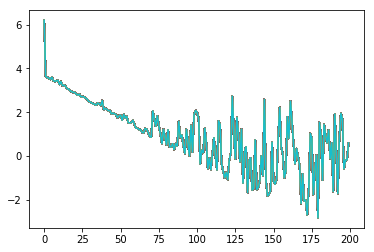

In [153]:
plt.plot(range(len(loss_hist_sto)),np.log(loss_hist_sto))
plt.show()

In [ ]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

    # TODO

if __name__ == "__main__":
    main()
